#  Author: Raghav Kavimandan

# Task : Exploratory data analysis
# GRIPJUN 2021
#### MAIN GOAL : FINDING OUT WEAK AREAS WHERE PROFIT CAN BE INCREASED 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
##############################################

###### There are no null values in our data set

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
#########################################

###### The top 10 states on the basis of pure sales 

In [62]:
top_10_states = df.sort_values(ascending=False, by='Sales')[['State', 'Sales']].head(10)
top_10_states

,State,Sales
2697,Florida,22638.480
6826,Indiana,17499.950
8153,Washington,13999.960
2623,New York,11199.968
4190,Delaware,10499.970
9039,Michigan,9892.740
4098,Minnesota,9449.950
4277,New Jersey,9099.930
8488,Virginia,8749.950
6425,Pennsylvania,8399.976


<AxesSubplot:xlabel='State', ylabel='Sales'>

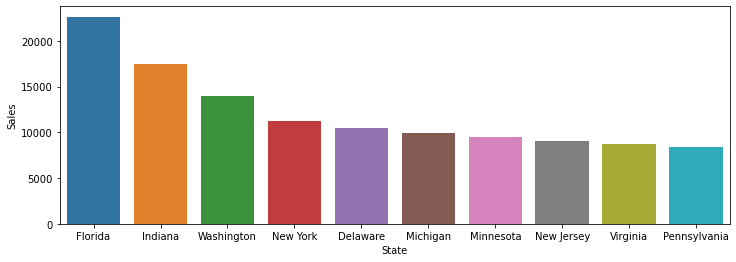

In [11]:
plt.figure(figsize=(12,4))
sns.barplot(data=top_10_states, x='State', y='Sales')

##### States on basis of Number of  Deals

In [12]:
highest_10_deals = df['State'].value_counts()
highest_10_deals.head(10)


California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

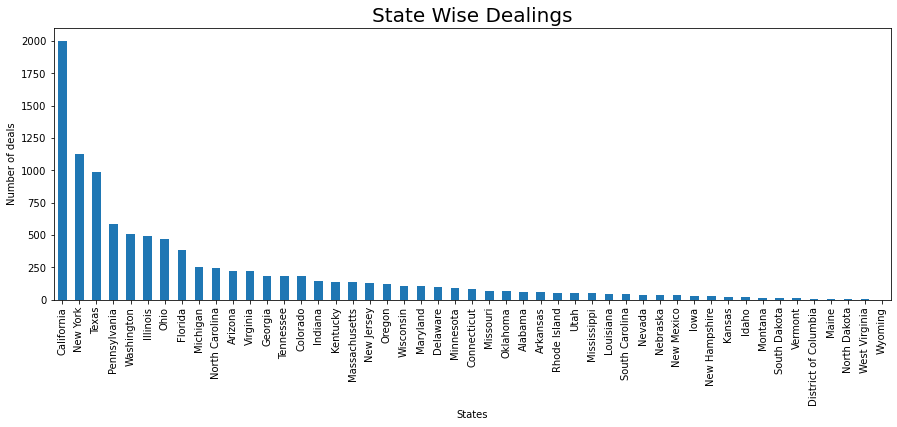

In [13]:
highest_10_deals.plot(kind='bar',figsize=(15,5))
plt.ylabel('Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

###### California has the highest amount of dealings, followed by New York and Texas.

In [14]:
###############################################################

## Region wise comparison of Sales and Profit :

###### Sales are highest in the South and East regions.
###### The standard deviation for the South region is the largest.

<AxesSubplot:xlabel='Region', ylabel='Sales'>

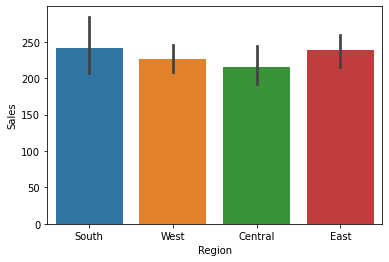

In [15]:
sns.barplot(data=df, x='Region', y='Sales')

###### West region has the highest amount of overall profit.

<AxesSubplot:xlabel='Region', ylabel='Profit'>

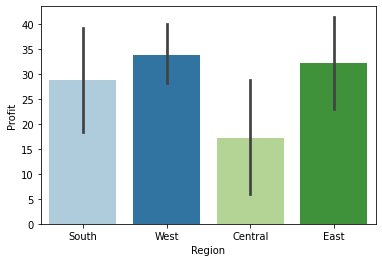

In [16]:
sns.barplot(data=df, x='Region', y='Profit', palette='Paired' )

In [ ]:
################################################################

## City wise comparison of sales and Profit:

In [123]:
top_cities = df.groupby(['City'])[['Sales', 'Discount','Profit']].mean()
new_df = top_cities.sort_values('Profit')
new_df.head(20)

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052
Clarksville,316.818571,0.271429,-150.764743
Medina,275.302444,0.433333,-149.227178
Burlington,866.723280,0.136000,-144.915088
San Antonio,370.229288,0.383051,-123.712715


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

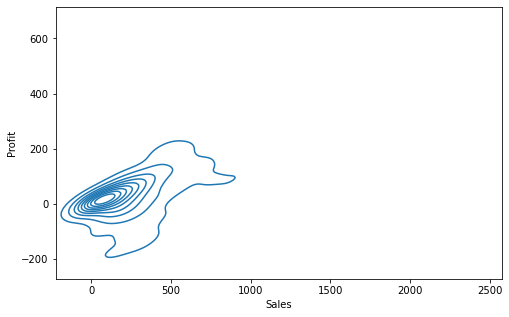

In [109]:
plt.figure(figsize=(8,5))
sns.kdeplot(data =new_df, x='Sales', y='Profit')

###### The average profit is positive but nearly zero

Text(0.5, 1.0, 'Sales per City')

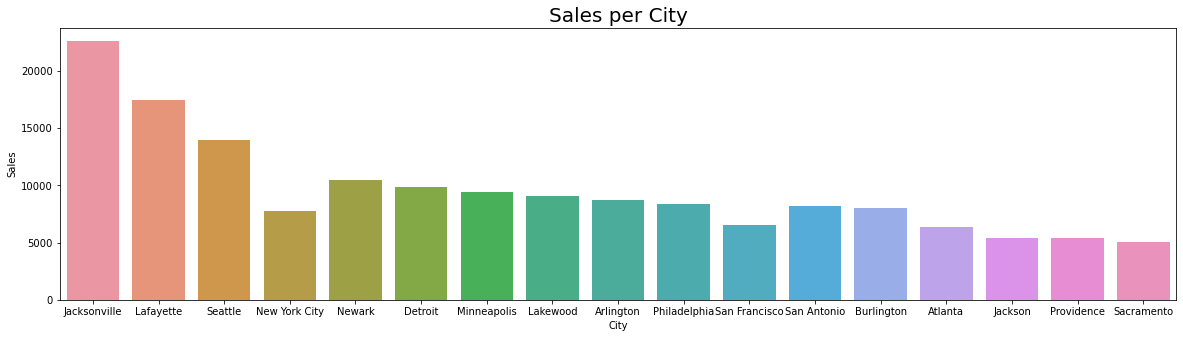

In [125]:
plt.figure(figsize=(20,5))
city_sales = df.sort_values('Sales', ascending=False)[['City', 'State', 'Sales']].head(20)

sns.barplot(data=city_sales, x='City', y='Sales', ci=None)
plt.title('Sales per City', fontsize=20)

Text(0.5, 1.0, 'Profits per City')

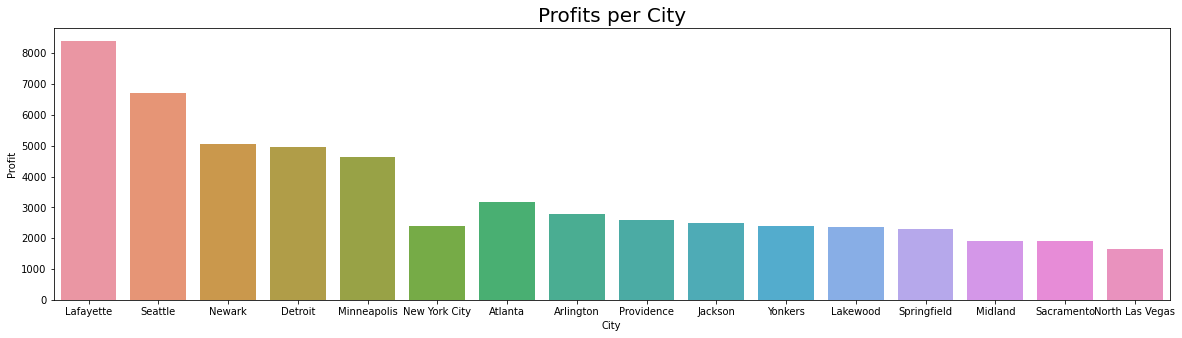

In [127]:
plt.figure(figsize=(20,5))
city_profits = df.sort_values('Profit', ascending=False)[['City', 'State', 'Profit']].head(20)

sns.barplot(data=city_profits, x='City', y='Profit', ci=None)
plt.title('Profits per City', fontsize=20)

Sales are highest in Jacksonville city  
Profit is highest in Lafayette city


In [ ]:
##################################################################

## Profit per Segment:

In [135]:
segment_df = df.groupby(['Segment'])[['Sales','Profit']].mean()
segment_df

,Sales,Profit
Segment,,
Consumer,223.733644,25.836873
Corporate,233.823300,30.456667
Home Office,240.972041,33.818664


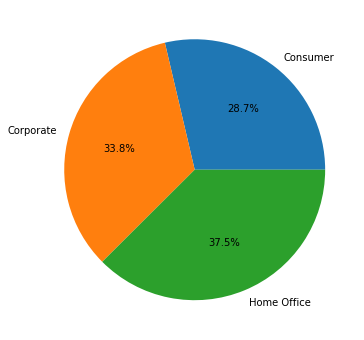

In [147]:
plt.figure(figsize=(18,6))
plt.pie(segment_df['Profit'], labels=['Consumer', 'Corporate', 'Home Office'], autopct='%1.1f%%');

Highest profit is in the Home Office Sector

In [ ]:
#########################################################

## Comparison between Sales and the Ship Mode:

###### The sales for same day shipment are highest
###### As seen from the graph the standard deviation for same day shipment is highest.

<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

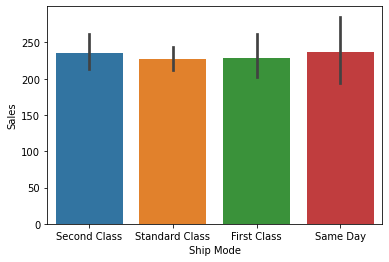

In [17]:
sns.barplot(data=df, x='Ship Mode', y='Sales')

##### Sales and Profit are moderately correlated

In [18]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [19]:
###################################################################

## Distribution Plots

Text(0.5, 1.0, 'Discount Distribution')

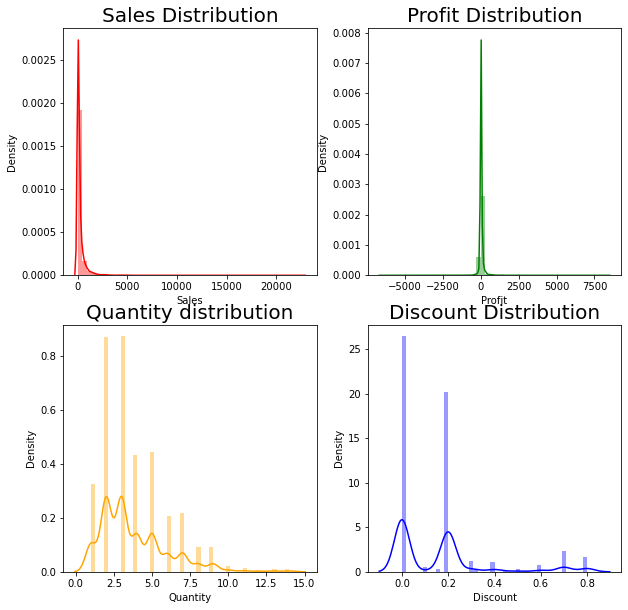

In [20]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)



###### Most of the sales are between 0 - 5000 units.
###### The overall profit nearly averages out to 0 and is Positive.

In [21]:
######################################################

## Sales per Category:

In [22]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [23]:
df1 = df.groupby(by='Category')[['Sales', 'Profit','Discount']].mean()
df1

,Sales,Profit,Discount
Category,,,
Furniture,349.834887,8.699327,0.173923
Office Supplies,119.324101,20.327050,0.157285
Technology,452.709276,78.752002,0.132323


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>,
       <AxesSubplot:ylabel='Discount'>], dtype=object)

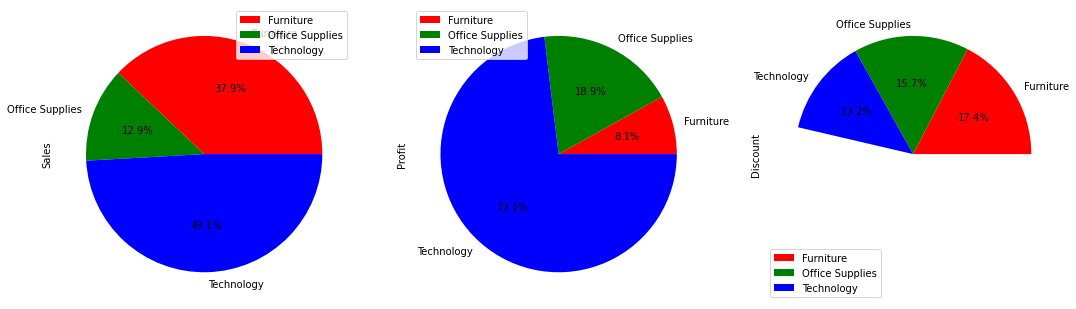

In [24]:
df1.plot.pie(subplots=True, figsize=(18, 20),autopct='%1.1f%%',
             labels = df1.index, colors=['r', 'g', 'b'])
                     

###### Sales and Profit are maximum for the Technology category.
###### Minimum profit is for the furniture category.


In [25]:
##################################################################

## Sales, Profit and Discount  per Sub-category:

In [26]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [35]:
df2 = df.groupby(by='Sub-Category')[['Sales', 'Profit', 'Discount']].mean()
df2


,Sales,Profit,Discount
Sub-Category,,,
Accessories,215.974604,54.111788,0.078452
Appliances,230.755710,38.922758,0.166524
Art,34.068834,8.200737,0.074874
Binders,133.560560,19.843574,0.372292
Bookcases,503.859633,-15.230509,0.211140
Chairs,532.332420,43.095894,0.170178
Copiers,2198.941618,817.909190,0.161765
Envelopes,64.867724,27.418019,0.080315
Fasteners,13.936774,4.375660,0.082028


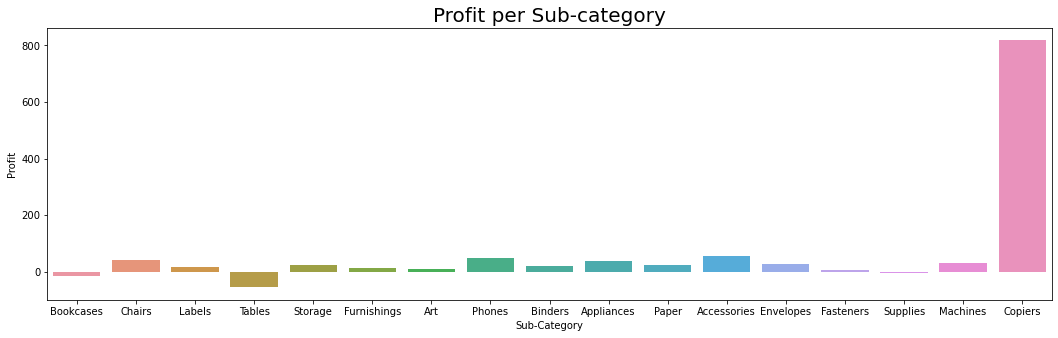

In [46]:
sub_category_profit = df.sort_values(by='Sub-Category')[['Sales', 'Profit', 'Discount']]
plt.figure(figsize=(18,5))
sns.barplot(data=sub_category_profit, y="Profit",x=df['Sub-Category'], ci=None)
plt.title('Profit per Sub-category', fontsize=20);

###### Copiers have the highest number of Profit and Tables have the lowest.


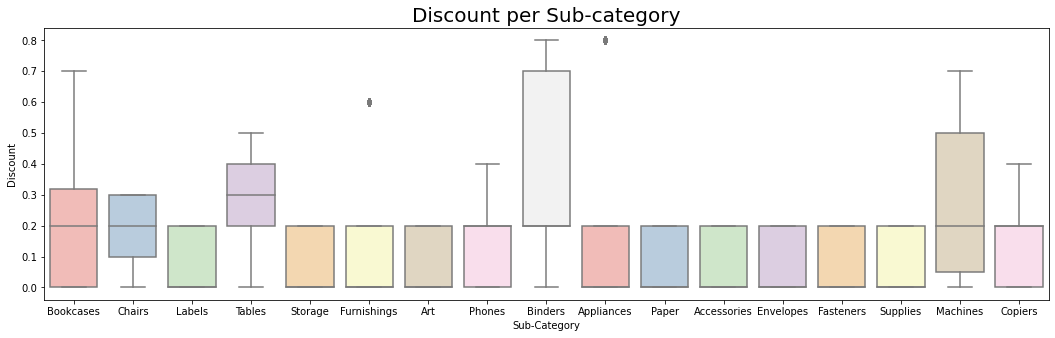

In [71]:
plt.figure(figsize=(18,5))

sns.boxplot(data=sub_category_profit, y="Discount",x=df['Sub-Category'], palette='Pastel1')
plt.title('Discount per Sub-category', fontsize=20);

###### Binders have the maximum discount followed by machines.

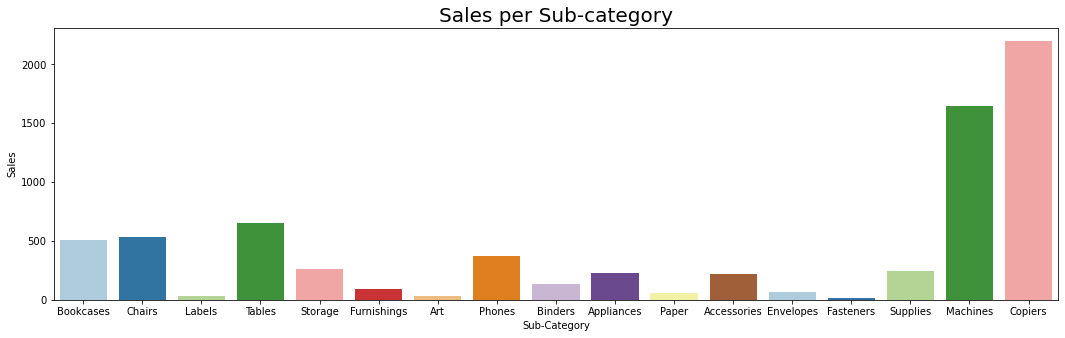

In [55]:
plt.figure(figsize=(18,5))

sns.barplot(data=sub_category_profit, y="Sales",x=df['Sub-Category'], palette='Paired', ci=None)
plt.title('Sales per Sub-category', fontsize=20);

###### Copiers have highest number of sales followed by machines and tables
Fasteners have the least amount of sales

In [ ]:
##############################################################